## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [39]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [40]:
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv")
df_row_count: int = len(data) # 1000
df_column_count: int = len(data.columns) # 21
data_slice = pd.concat([data.head(5), data.tail(5)])
data_slice

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [41]:
count_features = ["duration", "amount", "age"]
binary_features = ["telephone", "foreign_worker", "credit_risk", "people_liable"]
ordered_features = ["savings", "employment_duration", "installment_rate", "present_residence", "number_credits", "job", "property", "housing", "credit_history"]
categorial_features = list(filter(lambda feature: feature not in count_features and feature not in binary_features and feature not in ordered_features, data.columns))
data.isna().values.any()

False

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [42]:
sums_based_on_purpose = data.groupby("purpose")["amount"]
mean_sums_based_on_purpose: list[str] = list(map(lambda pair: f"Purpose: {pair[0]}; mean credit amount = {sum(pair[1]) / len(pair[1])}", sums_based_on_purpose))
print("\n".join(mean_sums_based_on_purpose))

Purpose: business; mean credit amount = 8209.333333333334
Purpose: car (new); mean credit amount = 5370.223300970873
Purpose: car (used); mean credit amount = 3066.983425414365
Purpose: domestic appliances; mean credit amount = 2728.090909090909
Purpose: furniture/equipment; mean credit amount = 2487.6857142857143
Purpose: others; mean credit amount = 3062.948717948718
Purpose: radio/television; mean credit amount = 1498.0
Purpose: repairs; mean credit amount = 3180.4
Purpose: retraining; mean credit amount = 4158.041237113402
Purpose: vacation; mean credit amount = 1205.888888888889


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [43]:
clients_younger_than_30 = data.query("`age` < 30")
clients_younger_than_30_that_rent = clients_younger_than_30.query("`housing` == 'rent'")
clients_younger_than_30_count = len(clients_younger_than_30.index)
clients_younger_than_30_that_rent_count = len(clients_younger_than_30_that_rent.index)

clients_older_than_40 = data.query("`age` > 40")
clients_older_than_40_that_rent = clients_older_than_40.query("`housing` == 'rent'")
clients_older_than_40_count = len(clients_older_than_40.index)
clients_older_than_40_that_rent_count = len(clients_older_than_40_that_rent.index)


print(f"Rent for clients younger than 30: {clients_younger_than_30_that_rent_count / clients_younger_than_30_count} - {100 * (clients_younger_than_30_that_rent_count / clients_younger_than_30_count)}% - ({clients_younger_than_30_that_rent_count} out of {clients_younger_than_30_count})")

print(f"Rent for clients older than 40: {clients_older_than_40_that_rent_count / clients_older_than_40_count} - {100 * (clients_older_than_40_that_rent_count / clients_older_than_40_count)}% - ({clients_older_than_40_that_rent_count} out of {clients_older_than_40_count})")

Rent for clients younger than 30: 0.6666666666666666 - 66.66666666666666% - (246 out of 369)
Rent for clients older than 40: 0.6801470588235294 - 68.01470588235294% - (185 out of 272)


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [44]:
# Попытка сделать универсально
foreign_workers = data.query("`foreign_worker` == 'yes'")
foreign_worker_count = len(foreign_workers.index)
unique_credit_statuses = list(filter(lambda cr_number: cr_number != '1' and cr_number != '2-3' and cr_number != '0', list(foreign_workers["number_credits"].unique())))

foreign_workers_with_credits_more_than_3 = 0
for credit_status in unique_credit_statuses:
    foreign_workers_with_credits_more_than_3 += len(foreign_workers.query(f"`number_credits` == '{credit_status}'").index)

print(f"Foreign workers with number_credits > 3: {foreign_workers_with_credits_more_than_3} ({foreign_workers_with_credits_more_than_3} out of {foreign_worker_count})")

Foreign workers with number_credits > 3: 1 (1 out of 37)


### Задание 6 (1 балл)

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

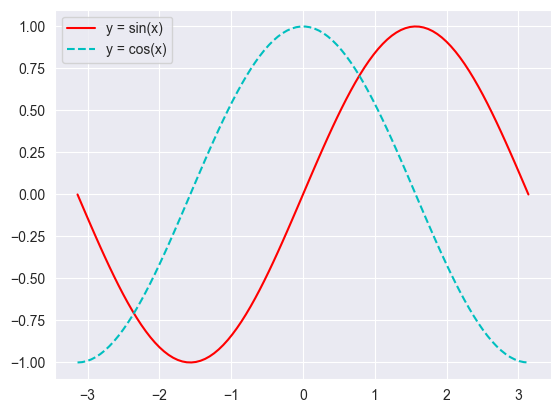

In [46]:
import math
x = np.linspace(-math.pi, math.pi, num=100)
fig, ax = plt.subplots()
sin, = plt.plot(x, np.sin(x), 'r', label="y = sin(x)")
cos, = plt.plot(x, np.cos(x), 'c--', label="y = cos(x)")
ax.legend(handles=[sin, cos])
plt.show()

# График синуса и косинуса на [-pi; pi].

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

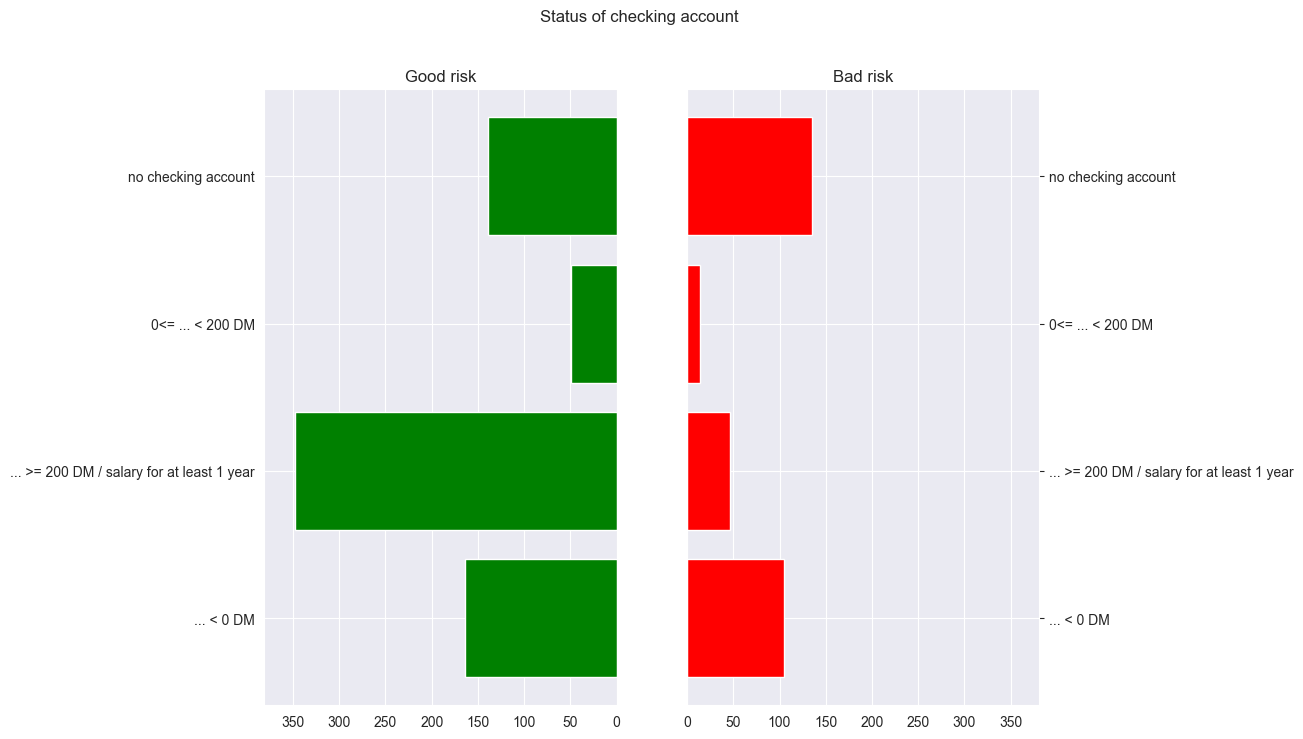

In [47]:
good_credit_risk = data.query("`credit_risk` == 'good'")
bad_credit_risk = data.query("`credit_risk` == 'bad'")

checking_accounts_good_risk = good_credit_risk.groupby("status")
checking_accounts_good_risk_counts = list(map(lambda pair: len(pair[1]), checking_accounts_good_risk))

checking_accounts_bad_risk = bad_credit_risk.groupby("status")
checking_accounts_bad_risk_counts = list(map(lambda pair: len(pair[1]), checking_accounts_bad_risk))

unique_statuses = sorted(list(foreign_workers["status"].unique()))

figure, (good_risk_ax, bad_risk_ax) = plt.subplots(1, 2, figsize=(10, 8))
figure.suptitle("Status of checking account")

good_risk_ax.set_title("Good risk")
good_risk_ax.barh(unique_statuses, checking_accounts_good_risk_counts, color="g")
good_risk_ax.set_xlim(380 + 1, 0)

bad_risk_ax.set_title("Bad risk")
bad_risk_ax.barh(unique_statuses, checking_accounts_bad_risk_counts, color="r")
bad_risk_ax.set_xlim(0, 380 + 1)
bad_risk_ax.yaxis.tick_right()

plt.show()
# Как мы можем видеть, хорошая кредитная история коррелирует с высокой зарплатой

### Задание 8  (0.5 балла)

In [48]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

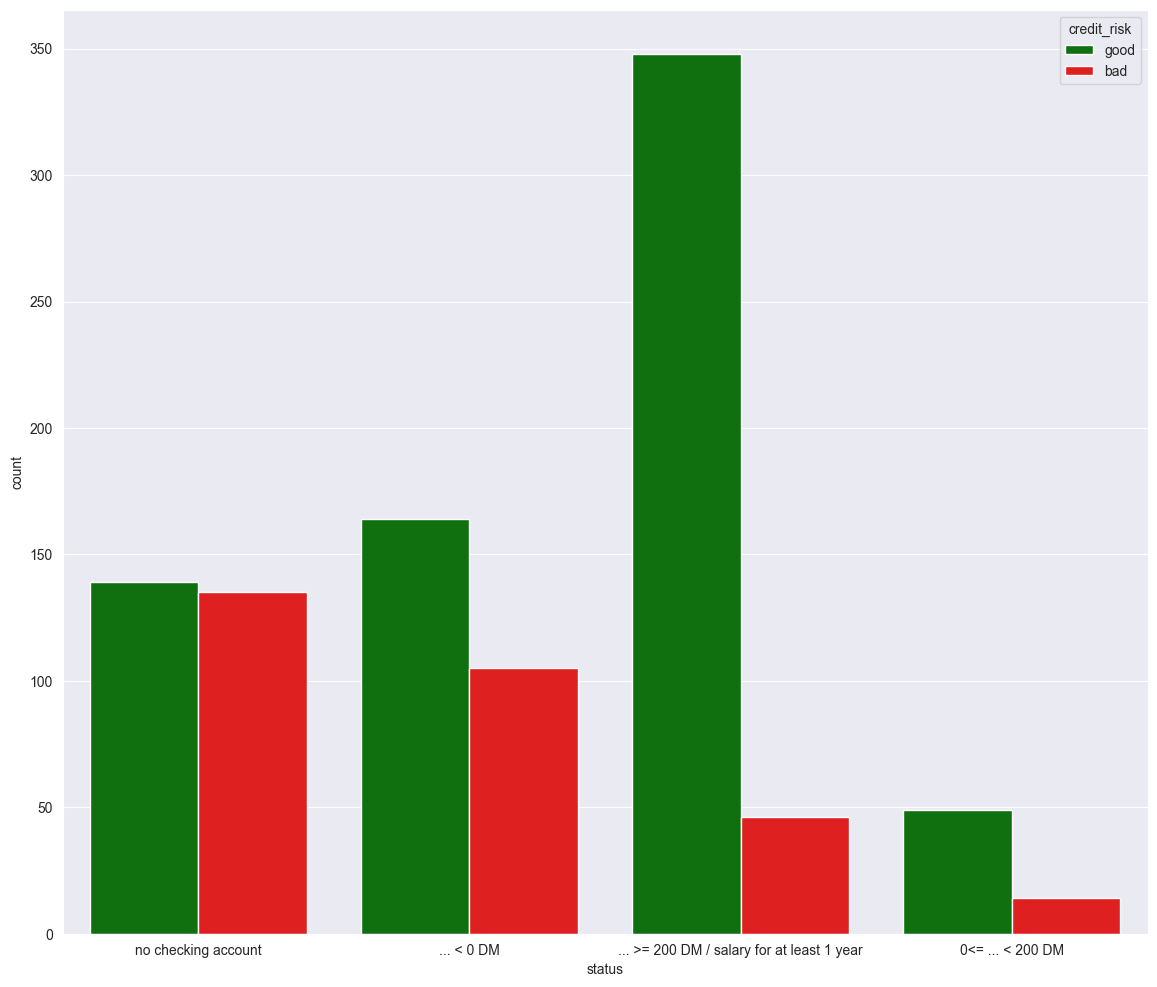

In [49]:
# И по количеству кода, и по восприятию выигрывает seaborn
_, ax = plt.subplots(figsize=(14, 12))
sns.countplot(data=data, x="status", hue="credit_risk", palette=["g", "r"], ax=ax)
plt.show()
# Тоже самое мы видим и здесь, хорошая кредитная история коррелирует с высокой зарплатой

### Задание 9 (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

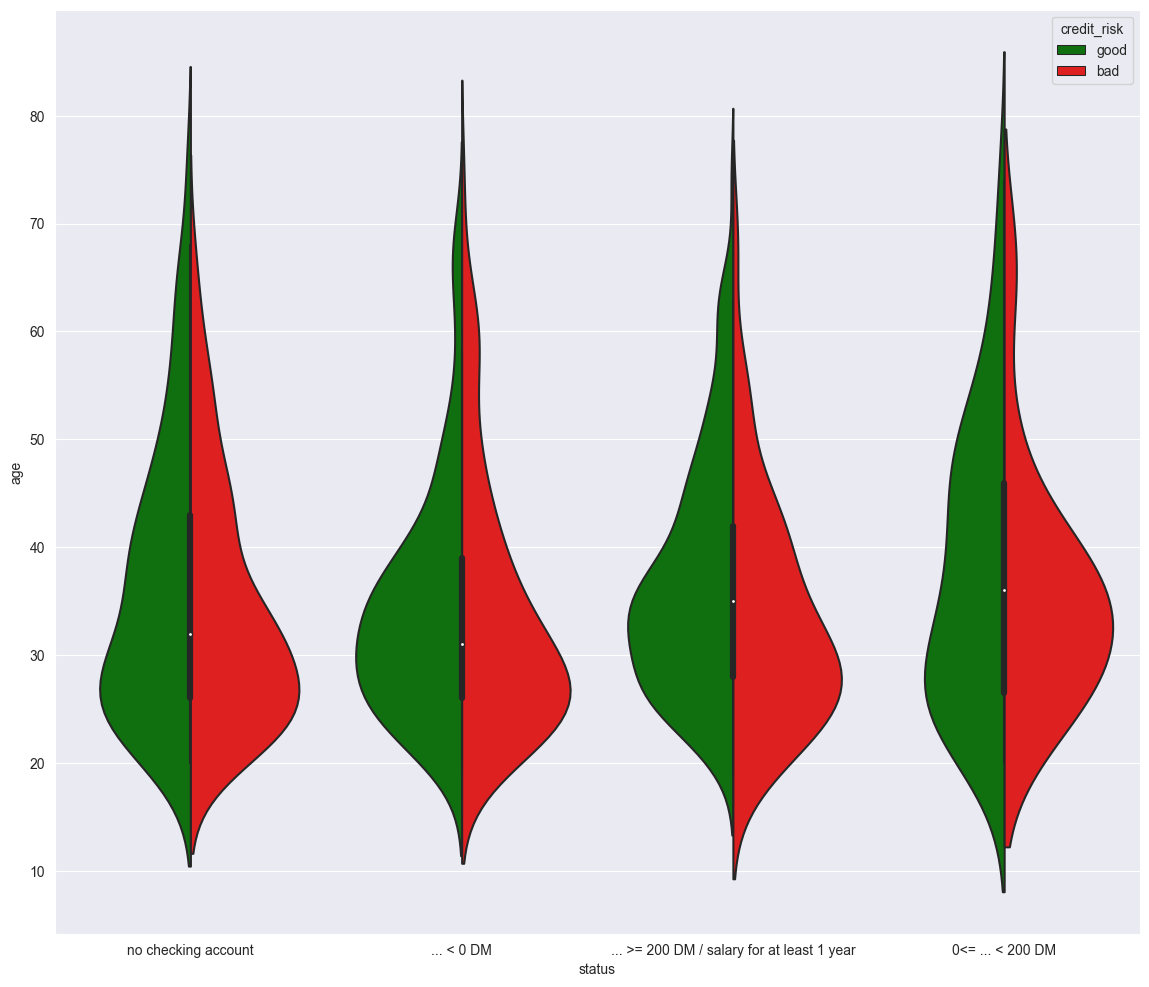

In [50]:
_, ax = plt.subplots(figsize=(14, 12))
sns.violinplot(data=data, x="status", y = "age", hue="credit_risk", palette=["g", "r"], ax=ax, split=True)
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

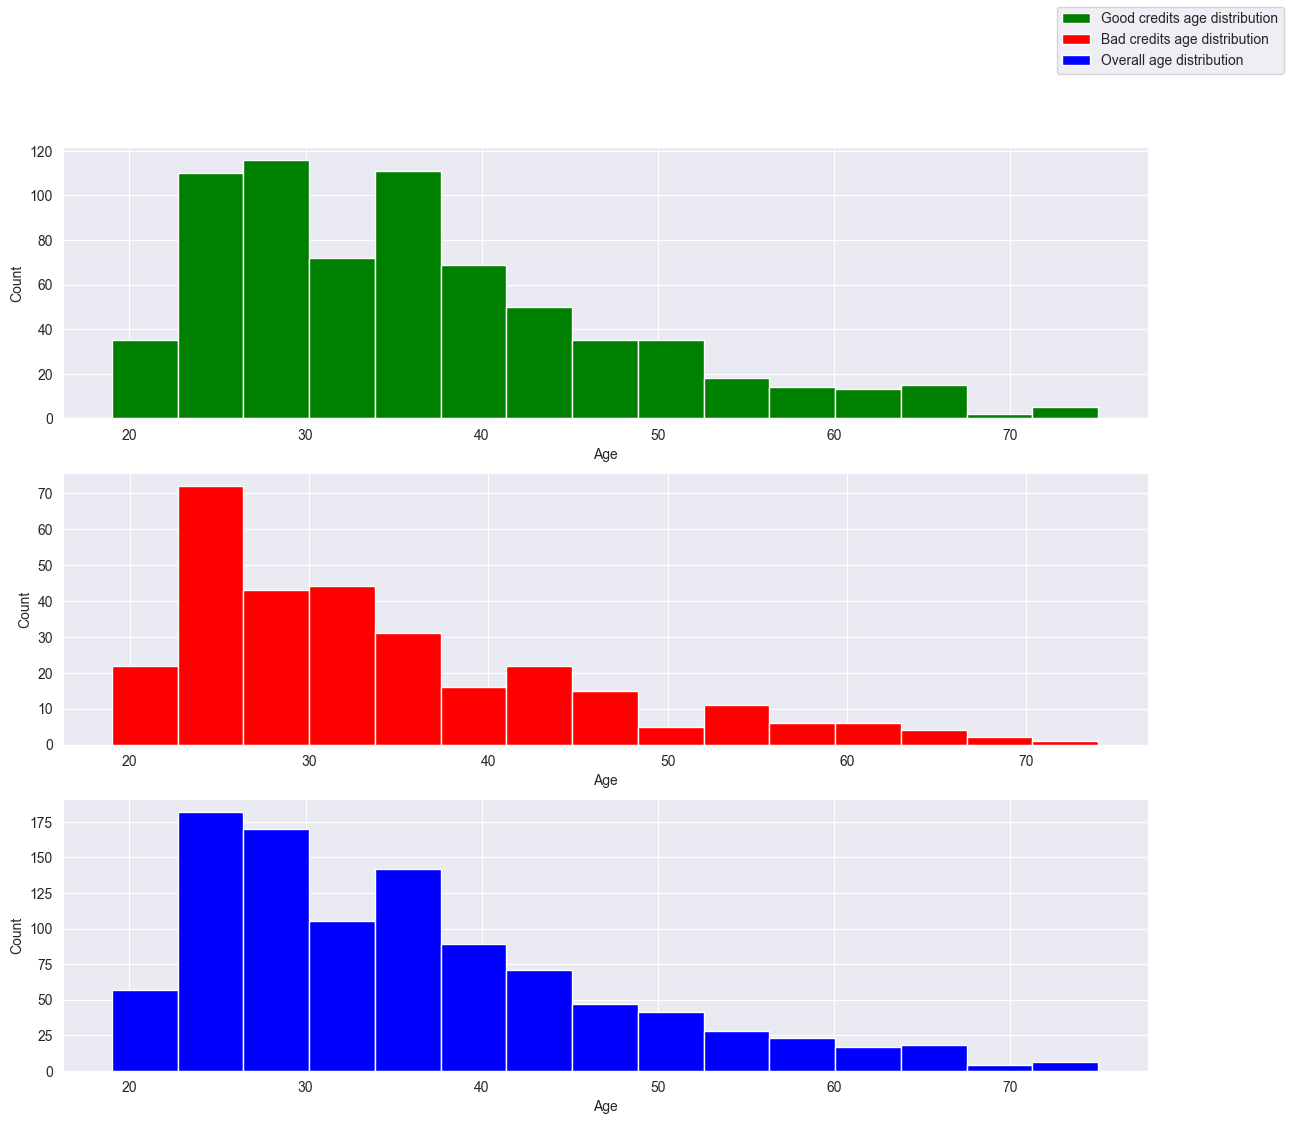

In [51]:
fig, (good, bad, overall) = plt.subplots(3, figsize=(14, 12))
good_credit_risk["age"].hist(bins=15, color="g", ax=good, label="Good credits age distribution")
good.set_xlabel("Age")
good.set_ylabel("Count")
bad_credit_risk["age"].hist(bins=15, color="r", ax=bad, label="Bad credits age distribution")
bad.set_xlabel("Age")
bad.set_ylabel("Count")
data["age"].hist(bins=15, color="b", ax=overall, label="Overall age distribution")
overall.set_xlabel("Age")
overall.set_ylabel("Count")

# Для каждого возраста
#sns.countplot(data=good_credit_risk, x="age", palette=["g"], ax=good, label="Good credits age distribution")
#sns.countplot(data=bad_credit_risk, x="age", palette=["r"], ax=bad, label="Bad credits age distribution")
#sns.countplot(data=data, x="age", palette=["b"], ax=overall, label="Overall age distribution")
fig.legend(loc="upper right")
plt.show()
# Наибольшее количество положительных кейсов наблюдается на промежутке от ~25 до ~35 лет
# Наибольшее количество отрицательных кейсов наблюдается на промежутке от ~22 до ~27 лет
# Наибольшее количество кейсов наблюдается на промежутке от 22 до 30 лет

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

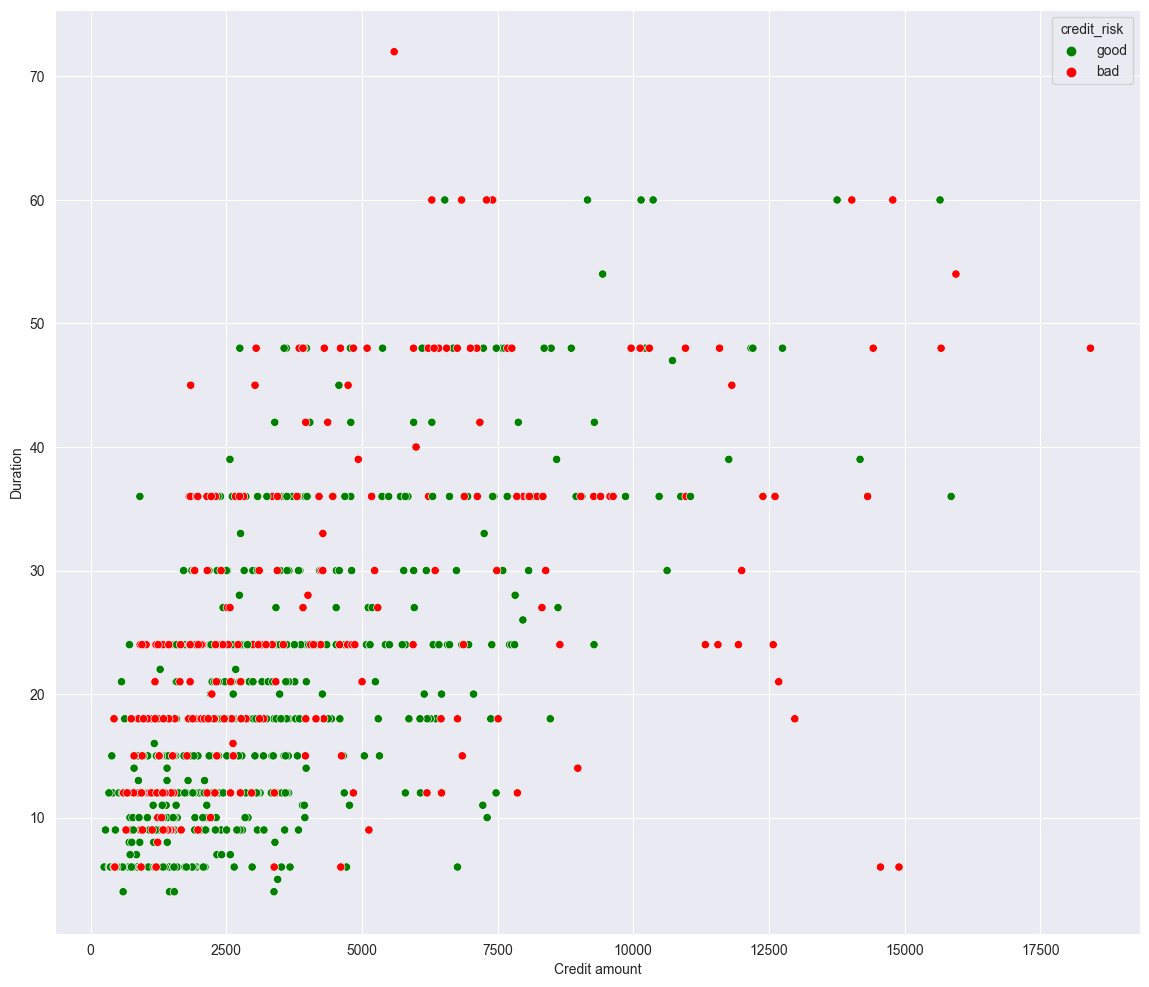

In [52]:
_, ax = plt.subplots(figsize=(14, 12))
sns.scatterplot(data=data, x="amount", y="duration", palette=["g", "r"], hue="credit_risk", ax=ax)
ax.set(xlabel="Credit amount", ylabel="Duration")
plt.show()
# Заметно, что большая часть кейсов - кредиты меньшей суммы и на меньшую продолжительность вреени

### Задание 12 (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

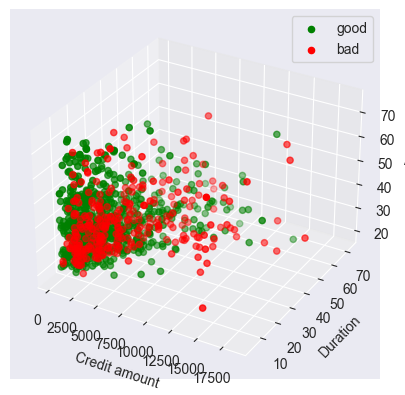

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

for risk in data.credit_risk.unique():
    ax.scatter(data.amount[data["credit_risk"] == risk], data.duration[data["credit_risk"] == risk], data.age[data["credit_risk"] == risk], label=risk, c=(risk=="good" and "g" or "r"))

ax.legend()
ax.set(xlabel="Credit amount", ylabel="Duration", zlabel="Age")
plt.show()
# 3д график демонстрирует тоже, что и предыдущий график, но к этому добавляется и то, что бОльшая часть кейсов идет от людей возраста менее 40 лет

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [54]:
# Датасет гениальный, хз как оптимизировать и автоматизировать маппинг, учитывая что мне в след. задании очень нужно корректное соответствие порядковых признаков для взятия линейной комбинации
data["telephone"] = data["telephone"].map({"yes (under customer name)": 1, "no": 0})
data["credit_risk"] = data["credit_risk"].map({"good": 1, "bad": 0})
data["foreign_worker"] = data["foreign_worker"].map({"yes": 1, "no": 0})
data["people_liable"] = data["people_liable"].map({"0 to 2": 0, "3 or more": 1})
data["savings"] = data["savings"].map({"unknown/no savings account": 0, "... <  100 DM": 1, "100 <= ... <  500 DM": 2, "500 <= ... < 1000 DM": 3, "... >= 1000 DM": 4})
data["employment_duration"] = data["employment_duration"].map({"unemployed": 0, "< 1 yr": 1, "1 <= ... < 4 yrs": 2, "4 <= ... < 7 yrs": 3, ">= 7 yrs": 4})
data["installment_rate"] = data["installment_rate"].map({">= 35": 0, "25 <= ... < 35": 1, "20 <= ... < 25": 2, "< 20": 3})
data["present_residence"] = data["present_residence"].map({"< 1 yr": 0, "1 <= ... < 4 yrs": 1, "4 <= ... < 7 yrs": 2, ">= 7 yrs": 3})
data["number_credits"] = data["number_credits"].map({">= 6": 0, "4-5": 1, "2-3": 2, "1": 3})
data["job"] = data["job"].map({"unemployed/unskilled - non-resident": 0, "unskilled - resident": 1, "skilled employee/official": 2, "manager/self-empl./highly qualif. employee": 3})
data["property"] = data["property"].map({"unknown / no property": 0, "building soc. savings agr./life insurance": 1, "car or other": 2, "real estate": 3})
data["housing"] = data["housing"].map({"for free": 0, "rent": 1, "own": 2})
data["credit_history"] = data["credit_history"].map({"critical account/other credits elsewhere": 0, "delay in paying off in the past": 1, "no credits taken/all credits paid back duly": 2, "existing credits paid back duly till now": 3, "all credits at this bank paid back duly": 4})

data.drop(categorial_features, axis=1, inplace=True)

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [55]:
bin_features = list(filter(lambda name: name != "credit_risk", binary_features))
def get_linear_combination_normalized(row) -> int:
    lin_comb: int = sum(map(lambda feature_name: row[feature_name] * 10, bin_features))
    lin_comb += sum(map(lambda feature_name: row[feature_name] * 10, ordered_features))
    max_lin_comb: int = len(binary_features) * 10 + len(ordered_features) * 10
    non_floored_result: float = lin_comb / max_lin_comb
    if non_floored_result > 0.80:
        return 1

    return 0

def predict(Xtest: np.array) -> np.array:
    df_to_run = pd.DataFrame(data=Xtest, columns=list(filter(lambda name: name != "credit_risk", list(data.columns))))
    pred_array: list[int] = []
    for _, row in df_to_run.iterrows():
        pred_array += [get_linear_combination_normalized(row)]

    return np.array(pred_array)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

/var/folders/xy/m4cdfw6x2fd4330g0n9s6hph0000gn/T/ipykernel_43998/1026746546.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('credit_risk', 1).values


0.66